# KISS-ICP running on the KITTI-Odometry benchmark dataset

The whole purpose of this notebook is to have a reproducable entry point for the experiments of the paper. You can also modify the system and just run this notebook to inspect the overall results

## Expected dataset layout

```
<data/kitti-odometry/dataset>
├── poses
│   ├── 00.txt
│   ├── 01.txt
│   ├── 02.txt
│   ├── 03.txt
│   ├── 04.txt
│   ├── 05.txt
│   ├── 06.txt
│   ├── 07.txt
│   ├── 08.txt
│   ├── 09.txt
│   ├── 10.txt
└── sequences
    ├── 00
    │   ├── calib.txt
    │   ├── poses.txt
    │   ├── times.txt
    │   └── velodyne
    ├── 01
    │   ├── ....

```

In [1]:
# Install KISS-ICP and Plotting tools
%pip install kiss-icp ipympl evo >/dev/null

import os

import kiss_icp
import matplotlib.pyplot as plt
import numpy as np
from evo.tools import plot
from kiss_icp.config import load_config
from kiss_icp.datasets import dataset_factory
from kiss_icp.pipeline import OdometryPipeline
from rich import print

%autoreload 2
%matplotlib inline
%matplotlib widget

Note: you may need to restart the kernel to use updated packages.


In [2]:
data_root = os.environ.get("DATASETS")
kitti_root = os.path.join(data_root, "kitti-odometry/dataset")
cfg_file = os.path.join(os.path.dirname(kiss_icp.__file__), "config/default.yaml")

print(f"Reading datasets from : {data_root}")
print(f"Configuration:")
print(load_config(cfg_file))

Reading datasets from : /home/ivizzo/data/

Configuration:

{
    'out_dir': 'results',
    'use_cache': True,
    'data': {
        'lidar_frequency': 10.0,
        'preprocess': True,
        'max_range': 100.0,
        'min_range': 5.0
    },
    'mapping': {'max_points_per_voxel': 20},
    'adaptive_threshold': {'initial_threshold': 2.0, 'min_motion_th': 0.1}
}

## Run all sequences on the dataset

In [3]:
from kiss_icp_eval import run_sequence


def kitti_sequence(sequence: int):
    return OdometryPipeline(
        dataset=dataset_factory(
            dataloader="kitti",
            data_dir=kitti_root,
            config=cfg_file,
            sequence=sequence,
        ),
        config=cfg_file,
    )


results = {}
for sequence in range(0, 11):
    run_sequence(kitti_sequence, sequence=sequence, results=results)

Now evaluating sequence 00


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.520   %      
         Average Rotational Error   0.191   deg/m  
  Absoulte Trajectory Error (ATE)   6.018   m      
  Absoulte Rotational Error (ARE)   0.020   rad    
                Average Frequency    67     Hz     
                  Average Runtime    14     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 01


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   0.630    %      
         Average Rotational Error   0.155    deg/m  
  Absoulte Trajectory Error (ATE)   39.529   m      
  Absoulte Rotational Error (ARE)   0.025    rad    
                Average Frequency     46     Hz     
                  Average Runtime     21     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence 02


  0%|                                                                                                         …

────────────────────────────────────────────────── 
                           Metric   Value    Units  
 ────────────────────────────────────────────────── 
        Average Translation Error   0.514    %      
         Average Rotational Error   0.148    deg/m  
  Absoulte Trajectory Error (ATE)   17.309   m      
  Absoulte Rotational Error (ARE)   0.025    rad    
                Average Frequency     61     Hz     
                  Average Runtime     16     ms     
 ──────────────────────────────────────────────────

Now evaluating sequence 03


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.658   %      
         Average Rotational Error   0.157   deg/m  
  Absoulte Trajectory Error (ATE)   3.342   m      
  Absoulte Rotational Error (ARE)   0.011   rad    
                Average Frequency    48     Hz     
                  Average Runtime    20     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 04


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.358   %      
         Average Rotational Error   0.147   deg/m  
  Absoulte Trajectory Error (ATE)   1.075   m      
  Absoulte Rotational Error (ARE)   0.608   rad    
                Average Frequency    54     Hz     
                  Average Runtime    18     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 05


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.308   %      
         Average Rotational Error   0.137   deg/m  
  Absoulte Trajectory Error (ATE)   2.010   m      
  Absoulte Rotational Error (ARE)   0.012   rad    
                Average Frequency    64     Hz     
                  Average Runtime    15     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 06


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.260   %      
         Average Rotational Error   0.078   deg/m  
  Absoulte Trajectory Error (ATE)   0.885   m      
  Absoulte Rotational Error (ARE)   0.006   rad    
                Average Frequency    46     Hz     
                  Average Runtime    21     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 07


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.328   %      
         Average Rotational Error   0.164   deg/m  
  Absoulte Trajectory Error (ATE)   0.776   m      
  Absoulte Rotational Error (ARE)   0.007   rad    
                Average Frequency    69     Hz     
                  Average Runtime    14     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 08


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.821   %      
         Average Rotational Error   0.177   deg/m  
  Absoulte Trajectory Error (ATE)   4.625   m      
  Absoulte Rotational Error (ARE)   0.017   rad    
                Average Frequency    54     Hz     
                  Average Runtime    18     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 09


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.504   %      
         Average Rotational Error   0.133   deg/m  
  Absoulte Trajectory Error (ATE)   3.700   m      
  Absoulte Rotational Error (ARE)   0.015   rad    
                Average Frequency    56     Hz     
                  Average Runtime    17     ms     
 ─────────────────────────────────────────────────

Now evaluating sequence 10


  0%|                                                                                                         …

───────────────────────────────────────────────── 
                           Metric   Value   Units  
 ───────────────────────────────────────────────── 
        Average Translation Error   0.560   %      
         Average Rotational Error   0.191   deg/m  
  Absoulte Trajectory Error (ATE)   2.172   m      
  Absoulte Rotational Error (ARE)   0.009   rad    
                Average Frequency    71     Hz     
                  Average Runtime    14     ms     
 ─────────────────────────────────────────────────

In [4]:
from kiss_icp_eval import print_metrics_table

print_metrics_table(results)

# Experiment Results
|Metric|Value|Units|
|-:|:-:|:-|
Average Translation Error| 0.50|% |
Average Rotational Error| 0.15|deg/m |
Absoulte Trajectory Error (ATE)| 7.40|m |
Absoulte Rotational Error (ARE)| 0.07|rad |
Average Frequency| 57.82|Hz |
Average Runtime| 17.09|ms |


## Trajectories Results

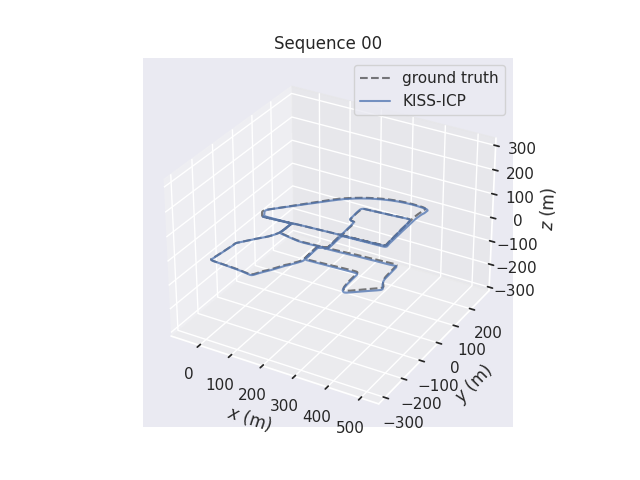

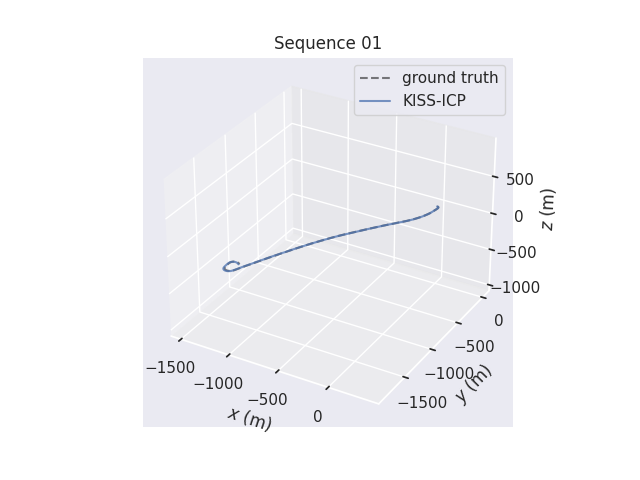

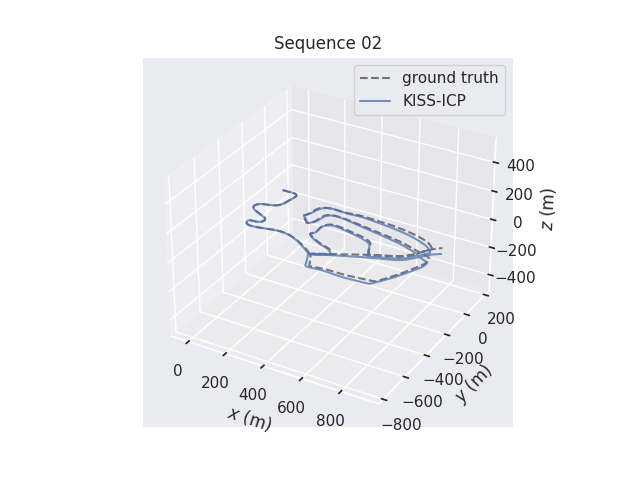

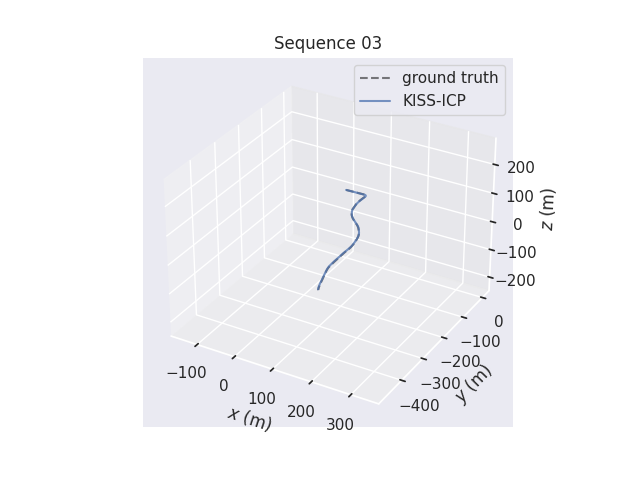

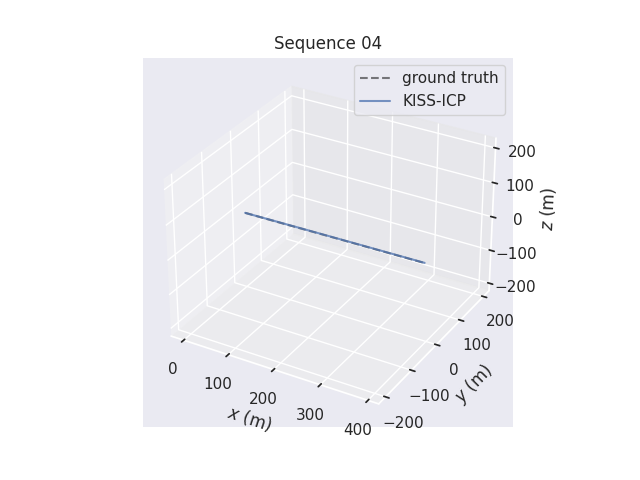

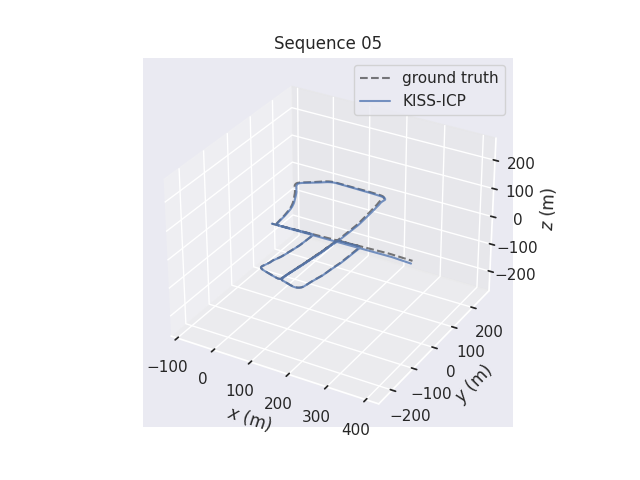

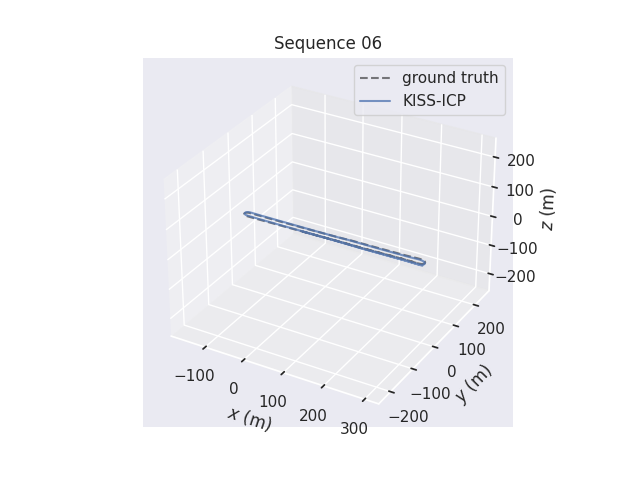

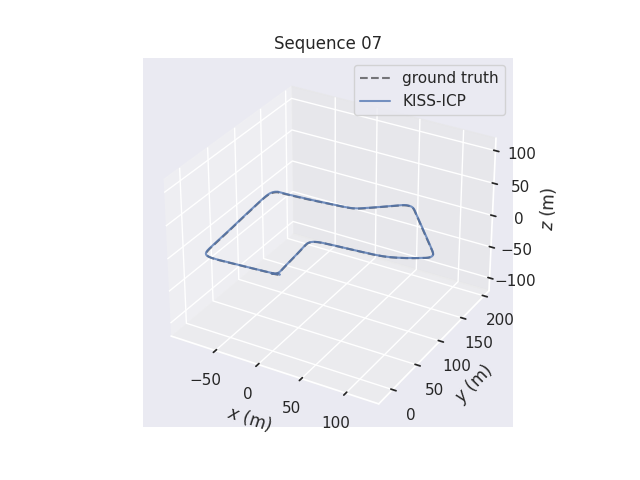

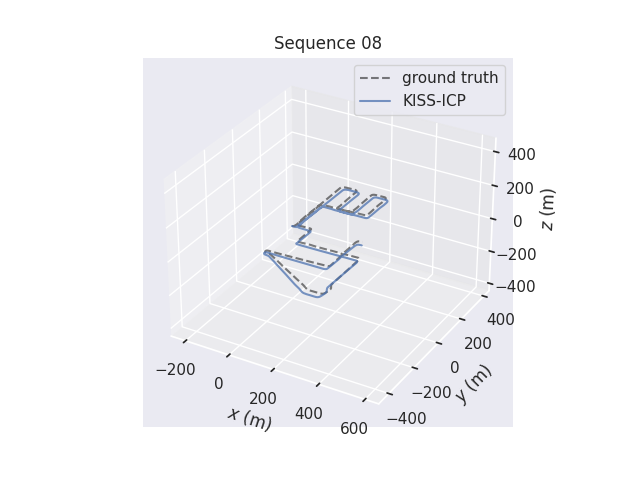

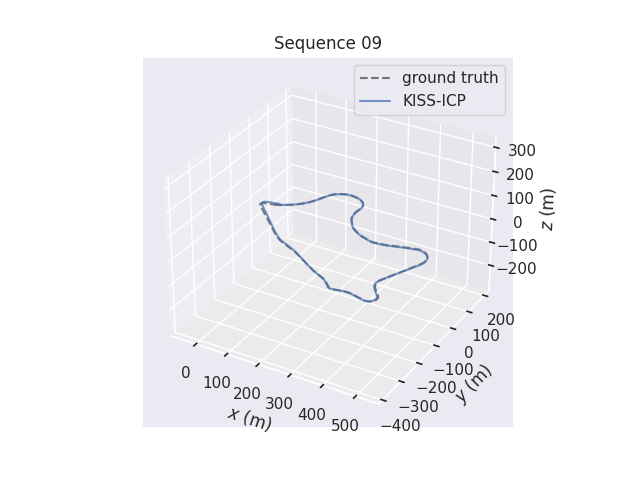

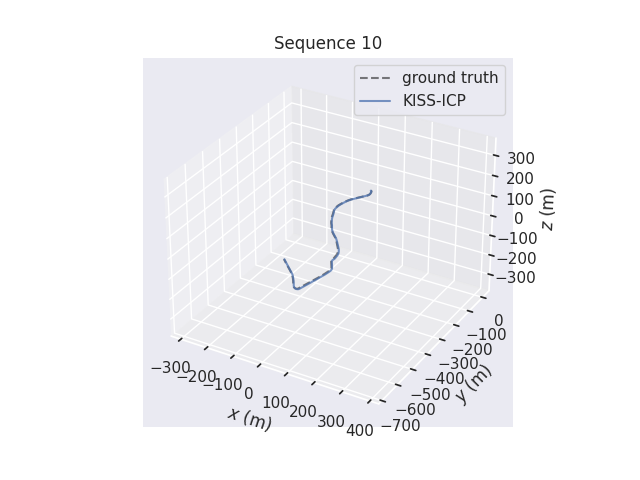

In [6]:
from kiss_icp_eval import plot_trajectories

plot_trajectories(results)